In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

from astropy.coordinates import SkyCoord
from astropy import units

In [2]:
brickname = '2408p222'
output = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/dr9_test/tractor/240/2408p222/rs0/tractor-2408p222.fits')
Input = fits.getdata('/global/cscratch1/sd/huikong/Obiwan/dr9m/obiwan_out/dr9m_test/divided_randoms/brick_2408p222.fits')[:10]


In [3]:
flux = output['flux_w1']
mwtransmission = output['mw_transmission_w1']
ag= 22.5 - 2.5 * np.log10(flux / mwtransmission)

In [4]:
cat1 = SkyCoord(ra=output['ra']*units.degree, dec=output['dec']*units.degree)
cat2 = SkyCoord(ra=Input['ra']*units.degree, dec=Input['dec']*units.degree)
i2, d2d, d3d = cat2.match_to_catalog_sky(cat1,nthneighbor=1) 

In [5]:
np.array(d2d)

array([  1.74950094e-06,   9.87260328e-02,   4.19414945e-07,
         2.78987113e-06,   3.67852928e-03,   6.75015992e-06,
         4.04442389e-06,   5.45890863e-02,   5.05319836e-06,
         1.50006437e-06])

In [6]:
sel = ag[i2]>0
sel1 = np.array(d2d)<2e-4
ag[i2]

array([ 20.69979858,  20.58341217,  21.20111084,  22.10747528,
        20.69979858,  22.7539978 ,  20.58341217,  20.69979858,
        20.65052605,  19.96163177], dtype=float32)

Text(0.5,1,'perfect source')

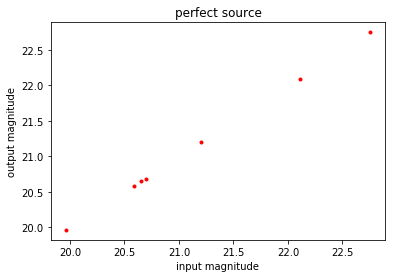

In [7]:
plt.plot(ag[i2][sel*sel1],Input[sel&sel1]['w1'],'r.')
plt.xlabel('input magnitude')
plt.ylabel('output magnitude')
plt.title('perfect source')

Text(0.5,1,'perfect source')

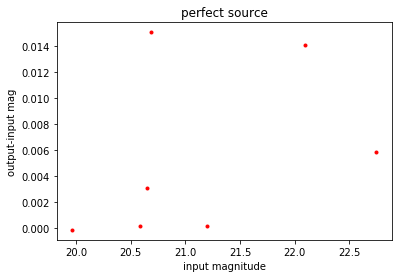

In [8]:
plt.plot(Input[sel&sel1]['w1'],ag[i2][sel*sel1]-Input[sel&sel1]['w1'],'r.')
plt.xlabel('input magnitude')
plt.ylabel('output-input mag')
plt.title('perfect source')

In [9]:
input_mag = Input[sel&sel1]['w1']
output_mag = ag[i2][sel*sel1]

ag= 22.5 - 2.5 * np.log10(flux / mwtransmission)

input_flux = 10**(-(input_mag-22.5)/2.5)
output_flux = 10**(-(output_mag-22.5)/2.5)

Text(0.5,1,'perfect source')

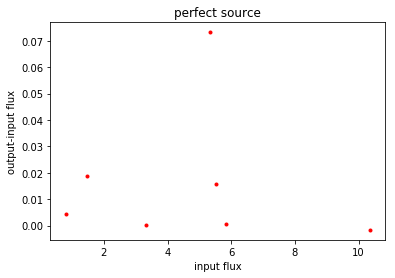

In [10]:
plt.plot(input_flux,input_flux-output_flux,'r.')
plt.xlabel('input flux')
plt.ylabel('output-input flux')
plt.title('perfect source')
